In [1]:
# Exporación de los datos disponibles

import idx2numpy
import matplotlib.pyplot as plt

In [15]:

# Cargamos datos de entrenamiento
file = './data/MNIST/raw/train-images-idx3-ubyte'
tr_imagearray = idx2numpy.convert_from_file(file)

file = './data/MNIST/raw/train-labels-idx1-ubyte'
tr_labelarray = idx2numpy.convert_from_file(file)

# Cargamos datos de test
file = './data/MNIST/raw/t10k-images-idx3-ubyte'
ts_imagearray = idx2numpy.convert_from_file(file)

file = './data/MNIST/raw/t10k-labels-idx1-ubyte'
ts_labelarray = idx2numpy.convert_from_file(file)


20 primeras imágenes del conjunto de entrenamiento:


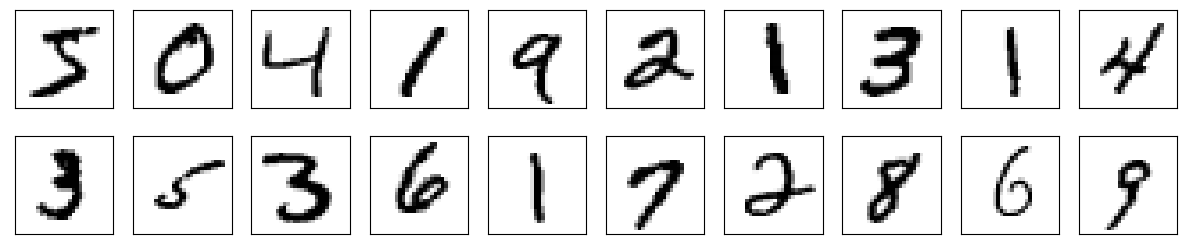

In [16]:
# Mostramos las 20 primeras imágenes de TR
print('20 primeras imágenes del conjunto de entrenamiento:')
fig = plt.figure(1,figsize=(15, 3))
for i in range(2*10):
    plt.subplot(2,10,i+1)
    plt.imshow(tr_imagearray[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

plt.show()


Detalle una imagen del conjunto de entrenamiento:


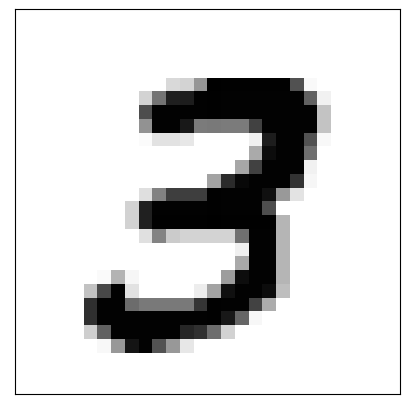

Valores en la matriz representando la imagen (una capa):


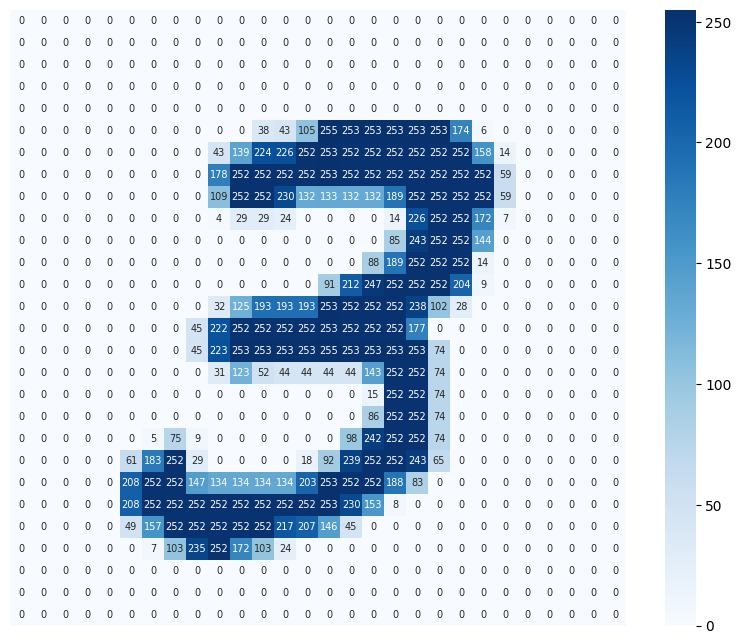

In [17]:
import seaborn as sns

print('Detalle una imagen del conjunto de entrenamiento:')
fig = plt.figure(1,figsize=(5,5))
plt.imshow(tr_imagearray[7], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

print('Valores en la matriz representando la imagen (una capa):')
fig = plt.figure(2,figsize=(10,8))
sns.heatmap(tr_imagearray[7], annot=True, square=True, annot_kws={"fontsize":7}, cmap='Blues', fmt='d')
plt.xticks([])
plt.yticks([])
plt.show()


In [18]:
import numpy as np

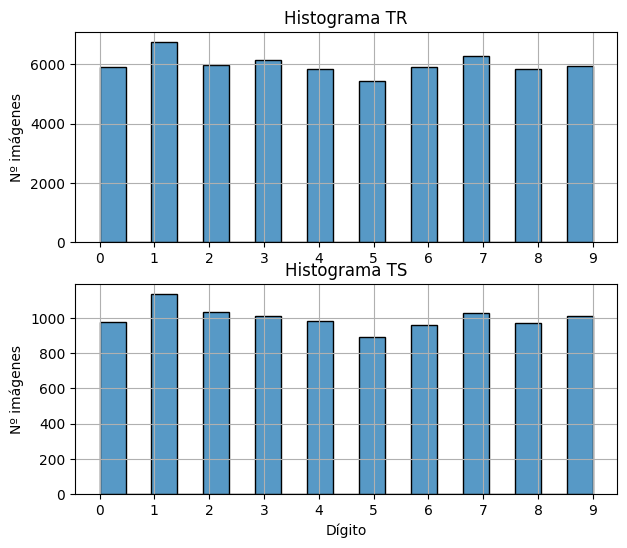

In [28]:

fig = plt.figure(1, figsize=(7, 6)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
plt.subplot(2,1,1)
sns.histplot(tr_labelarray, bins=19)
plt.title(f'Histograma TR')
plt.xticks(range(10))
plt.ylabel('Nº imágenes')
plt.grid()
plt.subplot(2,1,2)
sns.histplot(ts_labelarray, bins=19)
plt.title(f'Histograma TS')
plt.xlabel('Dígito')
plt.xticks(range(10))
plt.ylabel('Nº imágenes')
plt.grid()

plt.show()

In [29]:
# Convierte en TENSOR
import torch as T
print('Versión de Pytorch: ', T.__version__) 


Versión de Pytorch:  2.1.0


In [30]:
tr_img_ten = T.from_numpy(tr_imagearray)
ts_img_ten = T.from_numpy(ts_imagearray)

print(f"Shape of tensor: {tr_img_ten.shape}")
print(f"Datatype of tensor: {tr_img_ten.dtype}")
print(f"Device tensor is stored on: {tr_img_ten.device}")

Shape of tensor: torch.Size([60000, 28, 28])
Datatype of tensor: torch.uint8
Device tensor is stored on: cpu


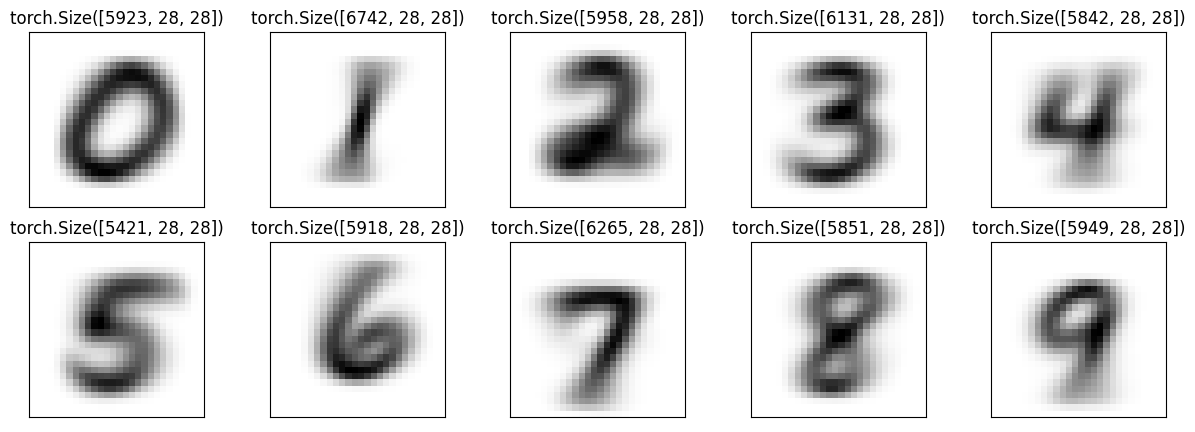

In [9]:

fig = plt.figure(1,figsize=(15,5))
for d in range(10):
    indices = tr_labelarray == d
    t_sel = tr_img_ten[indices,:,:]
    t_media = t_sel.mean(dim=[0], dtype=float)
    plt.subplot(2,5,d+1)
    plt.imshow(t_media, cmap=plt.cm.binary)
    plt.title(f'{t_sel.shape}')
    plt.xticks([])
    plt.yticks([])


primeras imágenes del conjunto de entrenamiento:


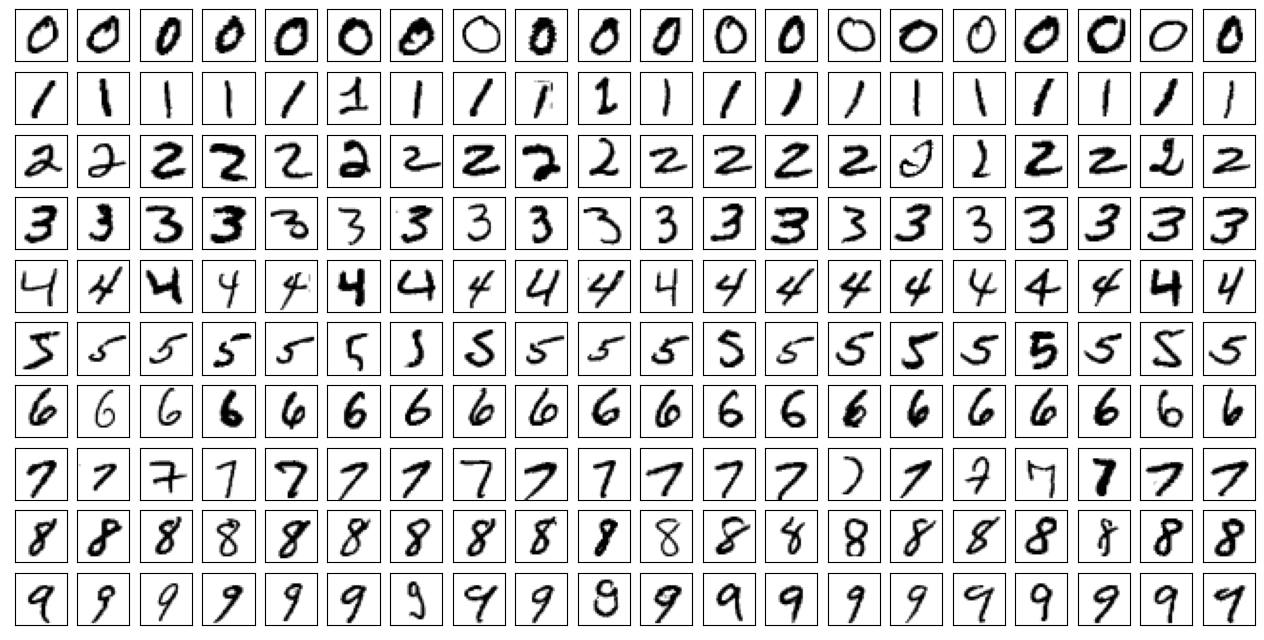

In [31]:
# Mostramos las 20 primeras imágenes de TR
print('primeras imágenes del conjunto de entrenamiento:')

fig = plt.figure(1,figsize=(16, 8))
k=1
for d in range(10):
    indices = tr_labelarray == d
    t_sel = tr_img_ten[indices,:,:]

    for i in range(20):
        plt.subplot(10,20,k)
        plt.imshow(t_sel[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        k = k+1

plt.show()

primeras imágenes del conjunto de entrenamiento:


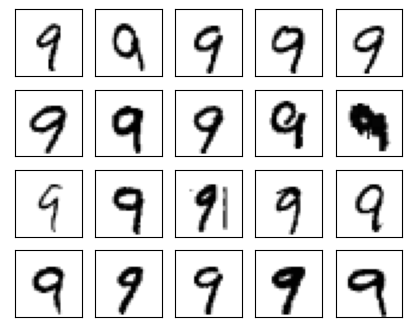

In [32]:
# Mostramos algunos casos con ruido
print('primeras imágenes del conjunto de entrenamiento:')

fig = plt.figure(1,figsize=(5,4))
k=1
indices_9 = tr_labelarray == 9
t_sel = tr_img_ten[indices_9,:,:]

for i in np.arange(180,200,1):
    plt.subplot(4,5,k)
    plt.imshow(t_sel[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    k = k+1

plt.show()

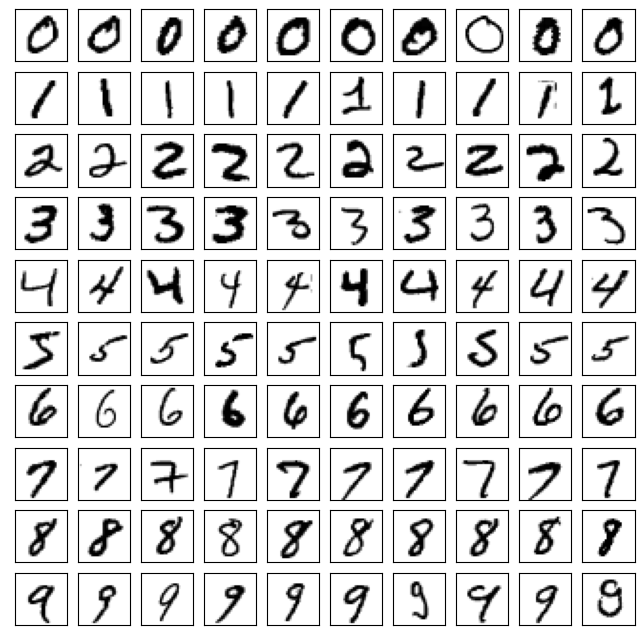

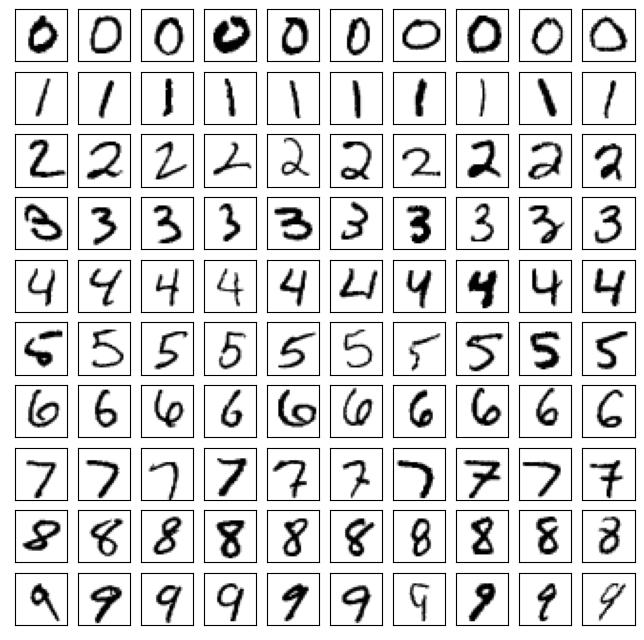

In [37]:
# compara medias de tr y ts para idea general

fig = plt.figure(1,figsize=(8, 8))
k=1
for d in range(10):
    indices = tr_labelarray == d
    t_sel = tr_img_ten[indices,:,:]

    for i in range(10):
        plt.subplot(10,10,k)
        plt.imshow(t_sel[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        k = k+1

plt.show()

fig = plt.figure(2,figsize=(8, 8))
k=1
for d in range(10):
    indices = ts_labelarray == d
    t_sel = ts_img_ten[indices,:,:]

    for i in range(10):
        plt.subplot(10,10,k)
        plt.imshow(t_sel[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        k = k+1

plt.show()


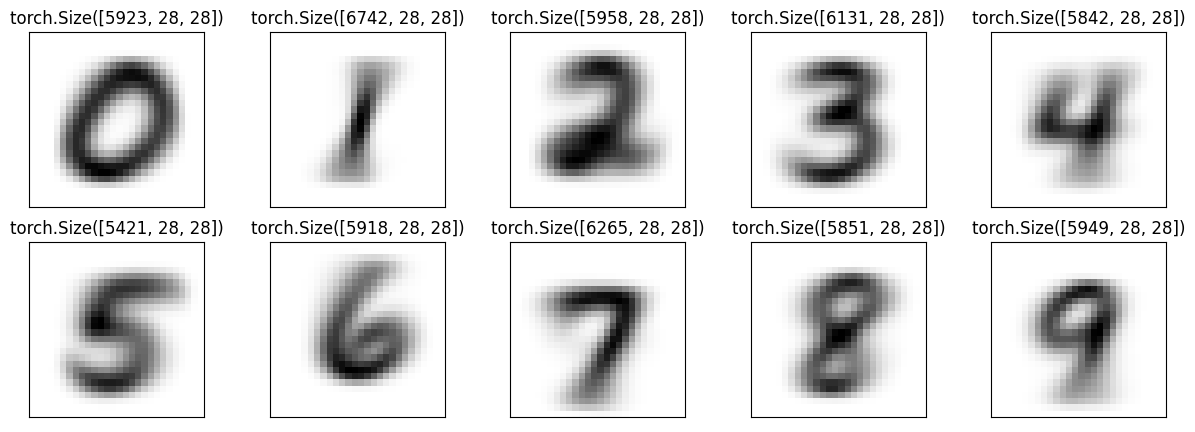

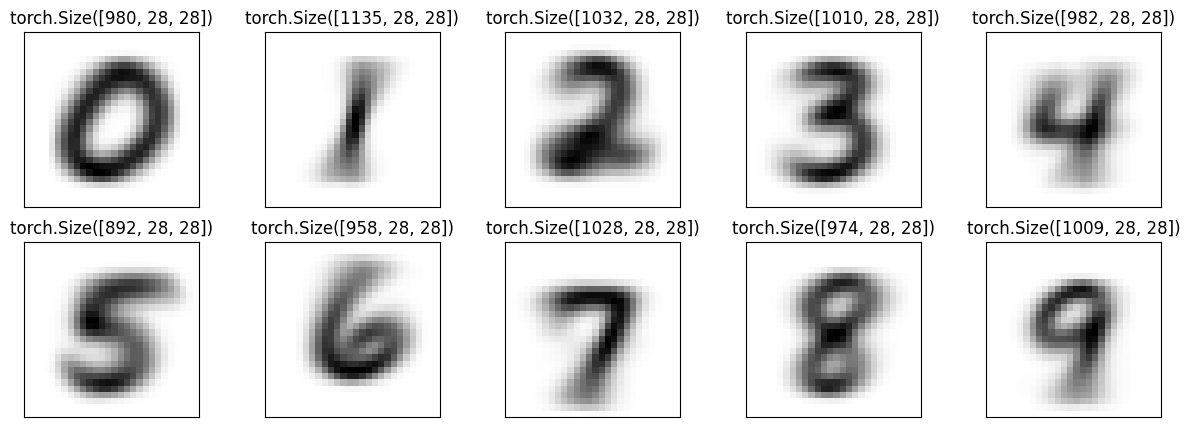

In [34]:

fig = plt.figure(1,figsize=(15,5))
for d in range(10):
    indices = tr_labelarray == d
    t_sel = tr_img_ten[indices,:,:]
    t_media = t_sel.mean(dim=[0], dtype=float)
    plt.subplot(2,5,d+1)
    plt.imshow(t_media, cmap=plt.cm.binary)
    plt.title(f'{t_sel.shape}')
    plt.xticks([])
    plt.yticks([])

fig = plt.figure(2,figsize=(15,5))
for d in range(10):
    indices = ts_labelarray == d
    t_sel = ts_img_ten[indices,:,:]
    t_media = t_sel.mean(dim=[0], dtype=float)
    plt.subplot(2,5,d+1)
    plt.imshow(t_media, cmap=plt.cm.binary)
    plt.title(f'{t_sel.shape}')
    plt.xticks([])
    plt.yticks([])
